In [62]:
import sys
sys.path.append('..')
import matplotlib.pyplot as plt
%matplotlib inline

import xarray as xr
import numpy as np

from wxdata.extras import spread
from wxdata.gfse import gfs_ensembles

In [74]:
datasets = gfs_ensembles(['2018-09-03 00:00', '2018-09-02 18:00', '2018-09-02 12:00'],
                        yield_single_times=True)

In [75]:
h5_datasets = [ds['hgtprs'].sel(lev=500) for ds in datasets]

In [76]:
target_time = '2018-09-12 00:00'

In [77]:
ds_full = xr.concat([ds.sel(time=target_time) for ds in h5_datasets], dim='time')

In [78]:
sd = ds_full.std(['ens', 'time'])
means = ds_full.mean(['ens', 'time'])

In [80]:
sd_norm = spread.lat_weighted_spread(sd, 'hgtprs', reducer=np.median)

In [244]:
means_subsetted = means.sel(lon=slice(180 - 113, 185), lat=slice(-5, 68))

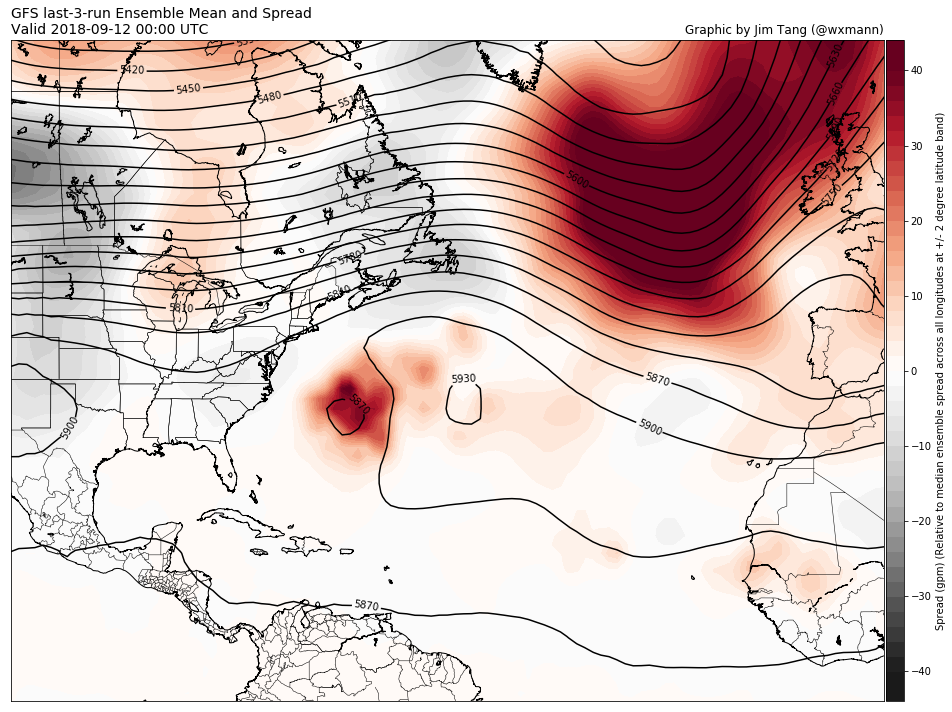

In [253]:
from wxdata.maps import simple_basemap
from wxdata.plotting import prepare_data_for_basemap, bottom_left_textbox, bottom_right_textbox, inset_colorbar, top_right_textbox
from wxdata.utils import two_sided_range

import numpy.ma as ma

fig, ax = plt.subplots(1, figsize=(16, 16))
na_map = simple_basemap(bbox=(-108, 0, 0, 63), us_detail=False)
levels = np.arange(4700, 6100, 30)

plotdata_means, x, y = prepare_data_for_basemap(means, na_map)

hgt_CS = na_map.contour(x, y, plotdata_means, latlon=True, levels=levels, 
                   colors='k', linewidths=1.5)

plt.clabel(hgt_CS, hgt_CS.levels[::1], inline=1,
                   inline_spacing=3, fontsize='medium', fmt='%d')

plotdata_sd, x, y = prepare_data_for_basemap(sd_norm, na_map)

na_map.contourf(x, y, plotdata_sd, latlon=True, cmap='RdGy_r', 
                levels=two_sided_range(0, 41, 2), extend='both')

plt.title('GFS last-3-run Ensemble Mean and Spread\nValid {} UTC'.format(target_time), loc='left', fontsize=14)
plt.title('Graphic by Jim Tang (@wxmann)', loc='right')

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="2%", pad=0.03)
plt.colorbar(cax=cax, orientation='vertical', 
             label='Spread (gpm) (Relative to median ensemble spread across all longitudes at +/- 2 degree latitude band)', 
             extendrect=True)